## Building a Stock Candlestick Chart Using Python

The purpose of this notebook is to use python to build a candlestick stock chart. In the script, we will pull historical stock data from the Yahoo Finance API and use several python libraries to organize and visualize the data. 

This is based on a Medium article you can view here: https://levelup.gitconnected.com/creating-candlestick-plots-for-stocks-50c35b1573aa

In [92]:
# imports

import time
from datetime import datetime
import pandas as pd

In [93]:
# initialize date values

# jan 1, 2022
dt = datetime(2022, 1, 1)
start_date = int(round(dt.timestamp()))

# mar 31, 2022
dt = datetime(2022, 6, 30)
end_date = int(round(dt.timestamp()))

# go with Google stock ticker
stock = 'GOOG'

In [94]:
# pull the data from yahoo finance's api

df = \
pd.read_csv(f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={start_date}&period2={end_date}&interval=1d&events=history&includeAdjustedClose=true",
           parse_dates = ['Date'], index_col = ['Date'])

# inspect the df head
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700
2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400
2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100
2022-01-06,2749.949951,2793.719971,2735.270020,2751.020020,2751.020020,1452500
2022-01-07,2758.100098,2765.094971,2715.780029,2740.090088,2740.090088,970400


In [95]:
# check out the size of the df and the column data types

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 123 entries, 2022-01-03 to 2022-06-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       123 non-null    float64
 1   High       123 non-null    float64
 2   Low        123 non-null    float64
 3   Close      123 non-null    float64
 4   Adj Close  123 non-null    float64
 5   Volume     123 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 6.7 KB


In [96]:
# review simple descriptive stats

df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,123.000000,123.000000,123.000000,123.000000,123.000000,1.230000e+02
mean,2548.835209,2583.632050,2510.308152,2543.949437,2543.949437,1.567812e+06
std,237.649119,231.649885,232.167535,231.096267,231.096267,5.401082e+05
min,2102.840088,2127.899902,2044.160034,2116.790039,2116.790039,7.459000e+05
25%,2316.405029,2356.051392,2281.430054,2321.755005,2321.755005,1.193700e+06
50%,2620.000000,2648.469971,2554.820068,2595.929932,2595.929932,1.475800e+06
75%,2737.859986,2764.547486,2703.572510,2738.060059,2738.060059,1.765600e+06
max,3037.270020,3042.000000,2911.149902,2960.729980,2960.729980,4.487500e+06


## Simple Price Plot

Build a simple plot of the historical stock price using matplotlib.

In [97]:
import matplotlib.pyplot as plt

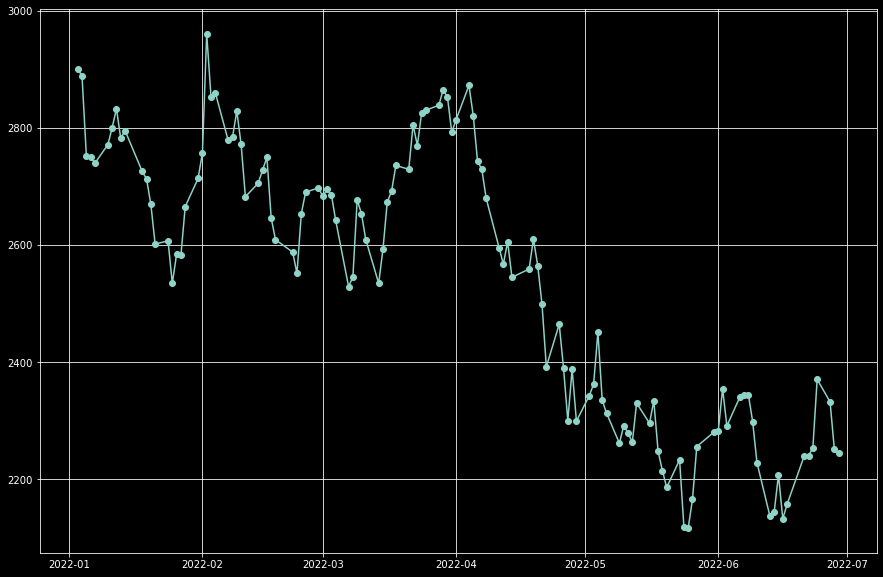

In [98]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(df.index, df['Close'], '-o')
ax.grid(True)

## Gridlines

Note that the x-axis plots the 1st and 15th of each month, which is not based on actual trading days. Let's try to modify this simple chart so the x-axis is formatted based on actual trading days.

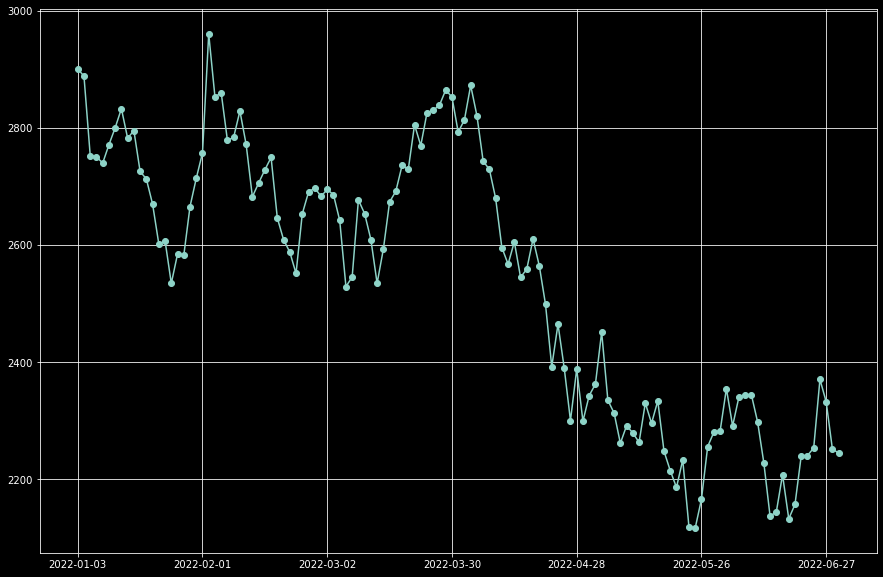

In [99]:
from matplotlib.ticker import Formatter
from matplotlib.dates import num2date
import numpy as np

rows = len(df)
indices = np.arange(rows)

# create a helper function to format the date
def format_date(x, pos = None):
    i = np.clip(int(x + 0.5), 0, rows - 1)
    return df.index[i].strftime('%Y-%m-%d')

# per the pandas dox, strftime() converts to Index using specified date_format

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(indices, df['Close'], '-o')
ax.xaxis.set_major_formatter(format_date)
ax.grid(True)

## Plotting Candlestick Chart using matplotlib

There are number of libraries that you can use to plot a candlestick plot. But let’s start with the basics — plotting one using matplotlib. 

Here are the steps:
* From the dataframe, get all the rows that are bullish (where their closing price is greater than or equal to the opening price)

* Get all the rows that are bearish (where their closing price is lesser than the opening price)

* Plot the real body of the bullish and bearish rows

* Plot the wicks of the bullish and bearish rows

The candlestick chart consists of the open, close, high, low for the day where:

* Real body — the rectangle showing the movements of the price from open to close. Typically green is used to represent an upward movement of price (bullish) and red is used to represent a downward movement in price (bearish).
* Wicks — the sticks above and below the open and close prices. These sticks represent the high and low prices of the stock during the particular trading day. The lengths of the sticks are called upper shadow and lower shadow.

In [100]:
# find the rows that are bullish
dfup = df[df.Close>=df.Open]

# find the rows that are bearish
dfdown = df[df.Close < df.Open]

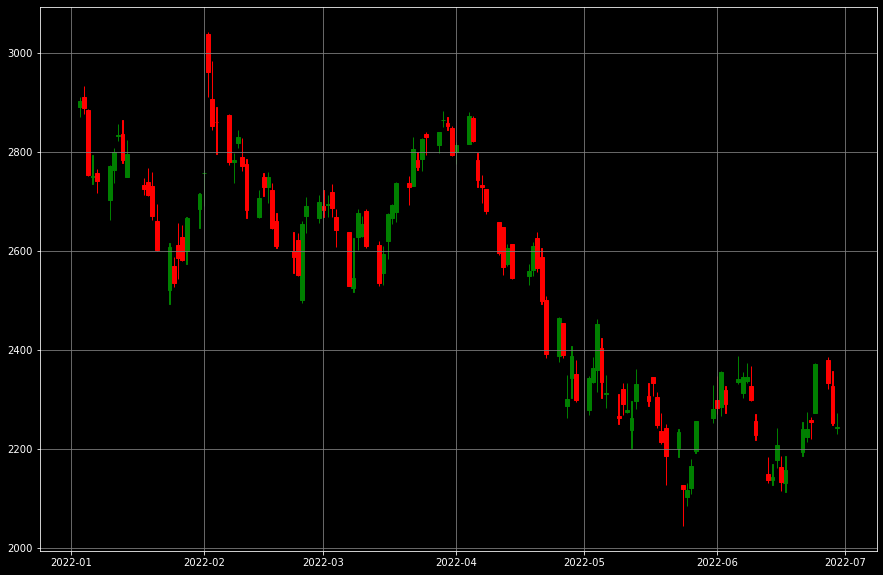

In [101]:
width  = 0.9   # width of real body
width2 = 0.05  # width of shadow
fig, ax = plt.subplots(figsize=(15,10))

#ax.plot(df.index, df['Close'], '-x')

# plot the bullish candle stick
ax.bar(dfup.index, dfup.Close - dfup.Open, width,
      bottom = dfup.Open, edgecolor='g', color='green')
ax.bar(dfup.index, dfup.High - dfup.Close, width2,
      bottom = dfup.Close, edgecolor='g', color='green')
ax.bar(dfup.index, dfup.Low - dfup.Open, width2,
      bottom = dfup.Open, edgecolor='g', color='green')

# plot the bearish candle stick
ax.bar(dfdown.index, dfdown.Close - dfdown.Open, width,
      bottom = dfdown.Open, edgecolor='r', color='red')
ax.bar(dfdown.index, dfdown.High - dfdown.Open, width2,
      bottom = dfdown.Open, edgecolor='r', color='red')
ax.bar(dfdown.index, dfdown.Low - dfdown.Close, width2,
      bottom = dfdown.Close, edgecolor='r', color='red')

ax.grid(color='gray')

Next:
Update to cast the x-axis values as trading days AND to use dark background

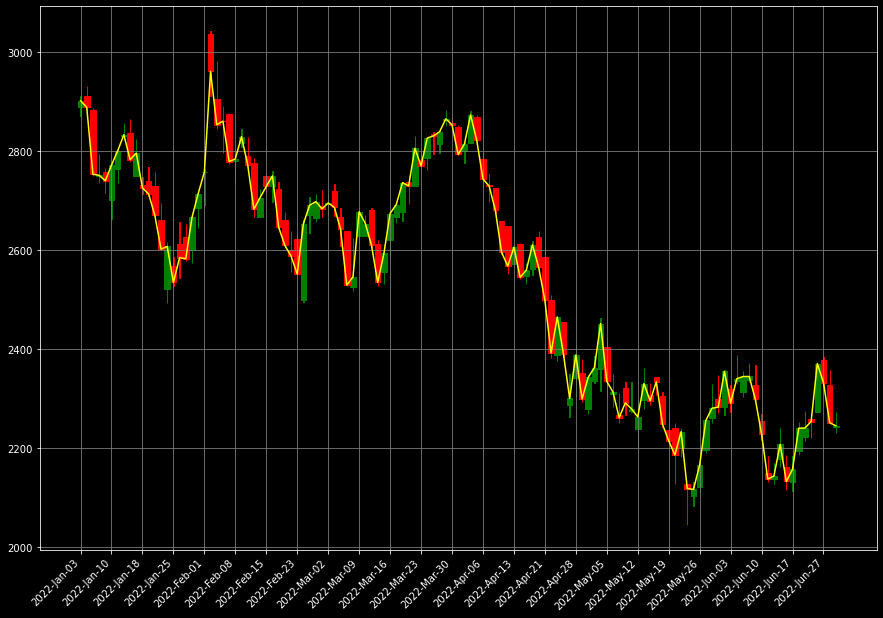

In [102]:
# trying the dark background theme
plt.style.use("dark_background")

width  = 0.9   # width of real body
width2 = 0.05  # width of shadow

# add a row to df containing the numrical indix of each row
df['indices'] = range(len(df))

# find the rows that are bullish; redine after adding df['indices']
dfup = df[df.Close>=df.Open]

# find the rows that are bearish
dfdown = df[df.Close < df.Open]

fig, ax = plt.subplots(figsize=(15,10))

# plot the bullish candle stick
ax.bar(dfup['indices'], dfup.Close - dfup.Open, width,
      bottom = dfup.Open, edgecolor='g', color='green')
ax.bar(dfup['indices'], dfup.High - dfup.Close, width2,
      bottom = dfup.Close, edgecolor='g', color='green')
ax.bar(dfup['indices'], dfup.Low - dfup.Open, width2,
      bottom = dfup.Open, edgecolor='g', color='green')

# plot the bearish candle stick
ax.bar(dfdown['indices'], dfdown.Close - dfdown.Open, width,
      bottom = dfdown.Open, edgecolor='r', color='red')
ax.bar(dfdown['indices'], dfdown.High - dfdown.Open, width2,
      bottom = dfdown.Open, edgecolor='r', color='red')
ax.bar(dfdown['indices'], dfdown.Low - dfdown.Close, width2,
      bottom = dfdown.Close, edgecolor='r', color='red')

ax.plot(df['indices'], df.Close, color='yellow')  

ax.grid(color='gray')

# set the ticks on the x-axis
ax.set_xticks(df[::5]['indices'])
# display the date for each x-tick
_ = ax.set_xticklabels(labels = 
        df[::5].index.strftime('%Y-%b-%d'), 
        rotation=45, ha='right')

## Plotting Candlestick Chart using Plotly
We will use the next section to import plotly to try this library for building a candlestick chart with less code than with matplotlib.

In [103]:
import plotly.graph_objects as go

In [104]:
fig = go.Figure(data=[go.Candlestick(x = df.index,
                                    open = df['Open'],
                                    high = df['High'],
                                    low = df['Low'],
                                    close = df['Close'])])

In [105]:
fig.update_layout(title='GOOG Stock Price 2022',
                 yaxis_title='Price ($)')
fig.show()

We see that the candlestick plot is a lot easier to implement & format using plotly. In addition to needed less code, the plotly istance includes sweet features like the range slider and the ability to hover over the data points to see the details for that trading day. 

## Plotting Candlestick Chart using Cufflinks
The next library that you can use to plot candlestick plots is Cufflinks.
Cufflinks is a Python library that connects directly with Pandas so that you can directly plot from Pandas DataFrames.

Cufflinks makes it very easy to create a candlestick plot, plus the ability to add additional charts to the current plot very easily.

In [106]:
import cufflinks as cf

In [107]:
cf.go_offline()

In [108]:
# To plot a candlestick plot, use the QuantFig class 
# and pass it the dataframe that contains your stock data. 
# Then, call the iplot() function of the QuantFig object:

qf = cf.QuantFig(df, title='GOOG 2022', name='GOOG')

qf.iplot()

Like Plotly, the plot created by Cufflinks is interactive — you can zoom into parts of the plot that you want to focus on and hovering over a particular candlestick will display the trading details.

In [109]:
# changing the colors to green and red

qf = cf.QuantFig(df, title='GOOG 2022', name='GOOG',
                up_color = 'green',
                down_color = 'red')

qf.iplot()

## Adding Moving Averages to Cufflinks Plot
You can also add additional charts easily to the current plot. For example, suppose you want to add a SMA (Simple Moving Average) plot using a 14-day period for the closing price. You can do this very easily using the add_sma() function.

In [110]:
qf = cf.QuantFig(df, title='GOOG 2022', name='GOOG',
                up_color = 'green',
                down_color = 'red')

# add a 14-day moving average
qf.add_sma(periods = 14, column = 'Close', color = 'blue' )

qf.iplot()

In [111]:
# adding multiple period SMA's to the cufflinks plot

qf = cf.QuantFig(df, title='GOOG 2022', name='GOOG',
                up_color = 'green',
                down_color = 'red')

# add a 14-day moving average
qf.add_sma(periods = [15, 20, 30, 50], column = 'Close', color = ['blue', 'green', 'brown',
                                                                 'orange'])

qf.iplot()

## Adding RSI to the Cufflinks Plot
You can also add a RSI chart to the plot.

In [112]:
qf = cf.QuantFig(df, title='GOOG 2022', name='GOOG',
                up_color = 'green',
                down_color = 'red')

# add a 14-day moving average
qf.add_sma(periods = [15, 20, 30, 50], column = 'Close', color = ['blue', 'green', 'brown',
                                                                 'orange'])

qf.add_rsi(periods = 14, color = 'red')

qf.iplot()

The **Relative Strength Index (RSI)** is a momentum indicator used in financial analytics. The RSI calculates the changes in recent price movements to examine if it is overbought or undersold:
* The RSI range from 0 to 100 in value
* Traditionally any value above 70 is overvalued and any value that is below 30 is undervalued

## Adding Volume to the Chart
One line lets us add volume chart below the price chart in cufflinks.

In [113]:
# simplified example

qf = cf.QuantFig(df, title='GOOG 2022', name='GOOG',
                up_color = 'green',
                down_color = 'red')

# add a 14-day moving average
qf.add_sma(periods = [20, 50], column = 'Close', color = ['blue', 'green'])

qf.add_rsi(periods = 14, color = 'red')
qf.add_volume()

qf.iplot()

In [114]:
# simplified example

qf = cf.QuantFig(df, title='GOOG 2022', name='GOOG',
                up_color = 'green',
                down_color = 'red')

# add a 14-day moving average
# qf.add_sma(periods = [20, 50], column = 'Close', color = ['blue', 'green'])

qf.add_rsi(periods = 14, color = 'red')
qf.add_volume()

qf.iplot()

You can also plot Candlestick Chart using bqplot. Bqplot is a python library developed by the Bloomberg developers team. But I'm going to skip that one here b/c it looks a lot like matplotlib IMO. 

## Conclusion
Just to restate, this was all code I learned from this article:
https://levelup.gitconnected.com/creating-candlestick-plots-for-stocks-50c35b1573aa
So my hats off to the author!

For me personally, I found cufflinks to be the easiest to use. That said, I liked how plotly gave me a range slider for free. But pound for pound, I'd have to go with cufflinks as the go-to for this use case (i.e., the ohlc or "candlestick" chart)!

That's it for now! I will be continuing to grow my python skills over time so that I may better study the financial markets, which I am fascinated with. As of now, I am trying to learn the basics of python for finance, but over time I will be using these skills to do something useful like event studies or allowing me to be alerted when technical trends shift and offer profit opportunities.